# A. Xuất ma trận điểm ảnh từ Python

## 1. Đọc ảnh và lưu thành ma trận pixel (dạng 8bit)

In [1]:
from PIL import Image 
import numpy as np

# Đọc ảnh grayscale
img = Image.open("fce5noi3.jpg").convert("L")
data = np.array(img)

# In ra ma trận pixel
print(data)


[[124 124 124 ... 124 124 124]
 [  6   6   6 ...   6   6   6]
 [  6   6   6 ...   6   6   6]
 ...
 [204 204 203 ...  65  61  60]
 [204 205 204 ...  62  60  60]
 [204 204 204 ...  62  61  63]]


In [2]:
i, j = 1, 1  # ví dụ
window = data[i-1:i+2, j-1:j+2].flatten()
print(window)  # Sẽ ra mảng 9 giá trị như p11, p12, ..., p33


[124 124 124   6   6   6   6   6   6]


In [3]:
with open("test_input.txt", "w") as f:
    for i in range(1, data.shape[0]-1):
        for j in range(1, data.shape[1]-1):
            win = data[i-1:i+2, j-1:j+2].flatten()
            f.write(" ".join(str(x) for x in win) + "\n")

In [4]:
# Lấy các cửa sổ 3x3, tạo file .mem mã nhị phân
with open("test_bi_input.mem", "w") as f:
    for i in range(1, data.shape[0]-1):
        for j in range(1, data.shape[1]-1):
            win = data[i-1:i+2, j-1:j+2].flatten()
            # Ghi mỗi pixel dưới dạng nhị phân 8-bit (dùng nếu bạn dùng `$readmemb`)
            line = " ".join(f"{x:08b}" for x in win)
            f.write(line + "\n")

In [5]:
# Lấy chiều cao và chiều rộng
H, W = data.shape
print(f"Kích thước ảnh: {H} x {W} (HxW)")

# Tính số cửa sổ 3x3 có thể áp dụng (không padding)
num_windows = (H - 2) * (W - 2)
print(f"Số cửa sổ 3x3 hợp lệ: {num_windows}")

Kích thước ảnh: 556 x 497 (HxW)
Số cửa sổ 3x3 hợp lệ: 274230


## 2. Code lại thuật toán trong paper sử dụng Python 

In [6]:
# === Modified Shear Sorting: từ cửa sổ 3x3 trả về median ===
def median_filter_modified_shear(window: np.ndarray) -> int:
    assert window.shape == (3, 3)

    # Step 1: Sort theo từng hàng
    row1 = sorted(window[0])
    row2 = sorted(window[1])
    row3 = sorted(window[2])

    # Step 2: Sắp xếp theo cột từ kết quả hàng
    col1 = sorted([row1[0], row2[0], row3[0]])  # cột 1
    col2 = sorted([row1[1], row2[1], row3[1]])  # cột 2
    col3 = sorted([row1[2], row2[2], row3[2]])  # cột 3

    # Step 3: Lấy đường chéo cần thiết: col1 max, col2 median, col3 min
    diag = sorted([col1[2], col2[1], col3[0]])

    # Trả về phần tử giữa
    return diag[1]

# === Load ảnh grayscale ===
img = Image.open("fce5noi3.jpg").convert("L")
data = np.array(img)
H, W = data.shape
print(f"Kích thước ảnh: {H}x{W}")

# === Apply median filter modified shear sorting ===
filtered = np.zeros((H - 2, W - 2), dtype=np.uint8)

for i in range(1, H - 1):
    for j in range(1, W - 1):
        window = data[i - 1:i + 2, j - 1:j + 2]
        filtered[i - 1, j - 1] = median_filter_modified_shear(window)

Kích thước ảnh: 556x497


# B. Test ouput

## 1. Sử dụng thuật toán Verilog (code lại bằng Python)

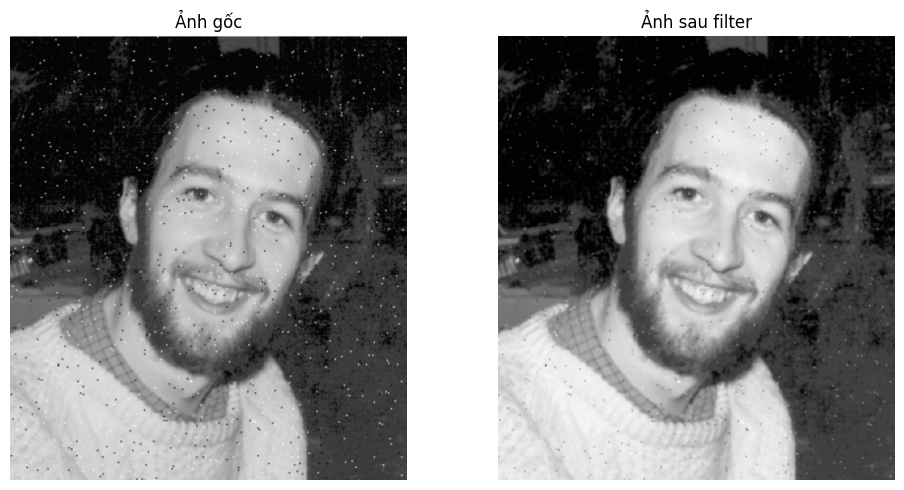

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered, cmap='gray')
plt.title("Ảnh sau filter")
plt.axis("off")

plt.tight_layout()
plt.show()

In [8]:
# === Save ===
Image.fromarray(filtered).save("filtered_modifiedshear.png")

## 2. Sử dụng thuật toán từ thư viện Python

Kích thước ảnh: 556 x 497


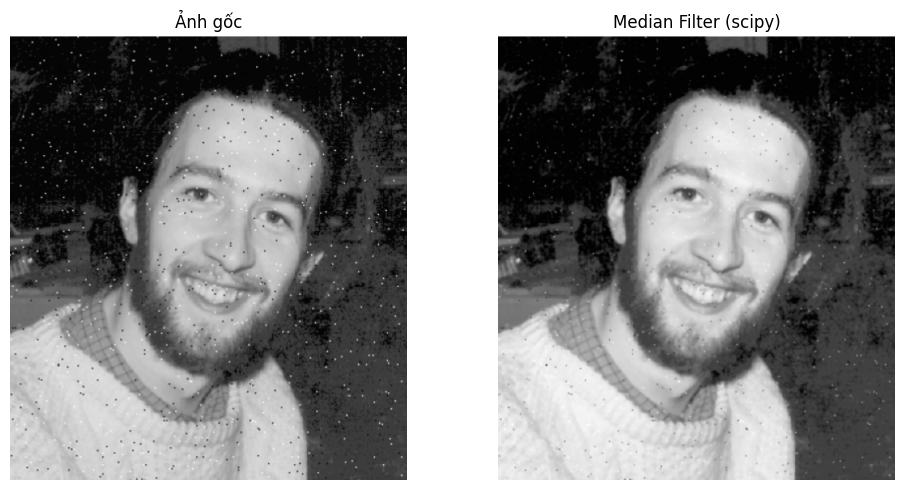

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# === Load ảnh grayscale ===
img = Image.open("fce5noi3.jpg").convert("L")
data = np.array(img)
H, W = data.shape
print(f"Kích thước ảnh: {H} x {W}")

# === Áp dụng median filter 3x3 chuẩn ===
filtered_lib = median_filter(data, size=3)

# === Hiển thị ảnh gốc và ảnh đã lọc ===
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_lib, cmap='gray')
plt.title("Median Filter (scipy)")
plt.axis("off")

plt.tight_layout()
plt.show()

# === (Tùy chọn) Lưu ảnh lọc lại ===
Image.fromarray(filtered).save("filtered_standard_median.png")


## 3. Tái tạo ảnh từ output sau khi chạy Verilog

Số lượng medians đọc được từ tệp: 274230
Kích thước ảnh gốc đã đọc: H=556, W=497
Số lượng median dự kiến dựa trên H, W: 274230


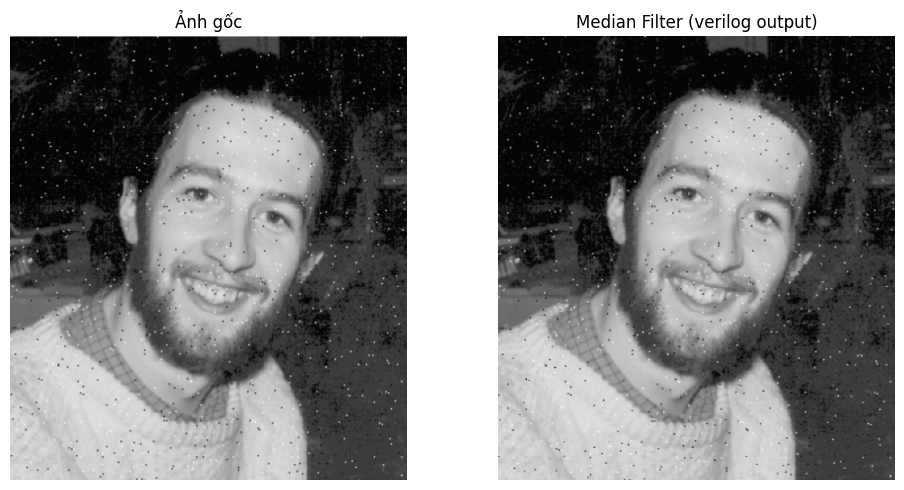

In [21]:
with open("median_output.mem", "r") as f:
    medians = [int(line.strip(), 2) for line in f.readlines()]

print(f"Số lượng medians đọc được từ tệp: {len(medians)}")
print(f"Kích thước ảnh gốc đã đọc: H={H}, W={W}")
print(f"Số lượng median dự kiến dựa trên H, W: {(H - 2) * (W - 2)}")

if len(medians) != (H - 2) * (W - 2):
    raise ValueError("Số giá trị median không khớp với ảnh đầu vào!")

filtered_verilog = np.array(medians, dtype=np.uint8).reshape((H - 2, W - 2))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_verilog, cmap='gray')
plt.title("Median Filter (verilog output)")
plt.axis("off")

plt.tight_layout()
plt.show()
